In [1]:
from keras.models import load_model
from joblib import load
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
scaler = load('scaler.joblib')
model = load_model('feature_extraction.h5')

In [2]:
test = pd.read_pickle('test.pkl')
val = pd.read_pickle('val.pkl')
x_columns = test.columns.values.tolist()
for col in ['date', 'name','30dGain', 'code','Y','priceTo每股公积金']:
    x_columns.remove(col)
x_columns

['open',
 'high',
 'low',
 'close',
 'volume',
 'turnover',
 'turnover_rate',
 '每股收益',
 '调整每股净资产',
 '每股现金流',
 '每股公积金',
 '每股未分配利润',
 '总资产',
 '扣非净利润',
 '主营利润率',
 '总资产净利率',
 '销售净利率',
 '净资产报酬率',
 '资产报酬率',
 '净资产收益率',
 '加权净资产收益率',
 '成本费用利润率',
 '主营业务成本率',
 '应收账款周转率',
 '存货周转率',
 '固定资产周转率',
 '总资产周转率',
 '流动资产周转率',
 '流动比率',
 '速动比率',
 '现金比率',
 '产权比率',
 '资产负债率',
 '现金流销售比',
 '现金流净利润比',
 '现金流负债比',
 '主营收入增长率',
 '净利润增长率',
 '净资产增长率',
 '总资产增长率',
 'priceTo每股收益',
 'priceTo调整每股净资产',
 'priceTo每股现金流',
 'priceTo每股未分配利润',
 '每股收益_scale',
 'priceTo每股收益_scale',
 '调整每股净资产_scale',
 'priceTo调整每股净资产_scale',
 '每股现金流_scale',
 'priceTo每股现金流_scale',
 '每股公积金_scale',
 'priceTo每股公积金_scale',
 '每股未分配利润_scale',
 'priceTo每股未分配利润_scale',
 '总资产_scale',
 'priceTo总资产_scale',
 '扣非净利润_scale',
 'priceTo扣非净利润_scale',
 '主营利润率_scale',
 'priceTo主营利润率_scale',
 '总资产净利率_scale',
 'priceTo总资产净利率_scale',
 '销售净利率_scale',
 'priceTo销售净利率_scale',
 '净资产报酬率_scale',
 'priceTo净资产报酬率_scale',
 '资产报酬率_scale',
 'priceTo资产报酬率_scale',
 '净资产收益率_scale',
 'price

In [3]:
x_val = val[x_columns].values
x_val = scaler.transform(x_val)
x_test = test[x_columns].values
x_test = scaler.transform(x_test)


In [4]:
Y_test = model.predict(x_test)
Y_val = model.predict(x_val)

3601/3601 [==============================] - 16s 4ms/step


# 验证集验证因子

In [5]:
feature = pd.DataFrame(Y_val)
feature['gain'] = val['30dGain'].values
feature

,0,1,2,3,4,5,6,7,gain
0,-0.122862,-0.628479,-0.747545,-0.429512,-0.690541,0.767295,0.574061,0.584003,0.057495
1,-0.041801,0.191527,-0.717861,-0.068447,0.512318,0.663454,0.101489,-0.081887,0.189586
2,-0.025351,0.423133,-0.565517,0.630576,0.826818,0.495545,-0.018705,-0.599669,0.043315
3,-0.066802,-0.062679,-0.701672,-0.017068,0.225055,0.673559,0.255679,0.032033,0.274074
4,-0.094146,-0.367570,-0.734556,-0.281023,-0.295065,0.729803,0.418667,0.353941,0.061005
...,...,...,...,...,...,...,...,...,...
115209,-0.106508,-0.481229,-0.729894,-0.282197,-0.459446,0.737359,0.485905,0.421166,-0.031348
115210,-0.097515,-0.382613,-0.705314,-0.107256,-0.263587,0.707435,0.434631,0.268994,-0.035670
115211,-0.104500,-0.472043,-0.743422,-0.360600,-0.468996,0.747114,0.477267,0.456509,-0.041494
115212,-0.059636,0.028899,-0.675837,0.148411,0.386851,0.641931,0.210571,-0.114055,0.061178


In [6]:
for col in feature.columns:
    if col !='gain':
        rank_ic = feature[col].corr(feature['gain'], method='spearman')
        print(f"Rank IC {col}:", rank_ic)


Rank IC 0: -0.16539195976059554
Rank IC 1: -0.17493708772134178
Rank IC 2: -0.16740848606871586
Rank IC 3: -0.1775627610400311
Rank IC 4: -0.18574543780951744
Rank IC 5: 0.1881319195184526
Rank IC 6: 0.16860219196632087
Rank IC 7: 0.1912295135314439


In [7]:
feature.describe()

,0,1,2,3,4,5,6,7,gain
count,115214.000000,115214.000000,115214.000000,115214.000000,115214.000000,115214.000000,115214.000000,115214.000000,115214.000000
mean,-0.079662,-0.190258,-0.691842,-0.008174,0.029689,0.676882,0.328451,0.099224,0.000391
std,0.020485,0.225310,0.048857,0.283717,0.361171,0.058576,0.123273,0.268880,0.116303
min,-0.126878,-0.648941,-0.852431,-0.871325,-0.733035,0.341930,-0.194962,-0.798373,-0.407853
25%,-0.095409,-0.368250,-0.723863,-0.206989,-0.263223,0.643563,0.246460,-0.084695,-0.063514
50%,-0.081252,-0.210299,-0.695013,-0.009653,0.028428,0.681844,0.340841,0.107114,-0.009143
75%,-0.065699,-0.034016,-0.663783,0.184416,0.310515,0.717822,0.423877,0.302537,0.048780
max,0.001192,0.642499,-0.407601,0.874150,0.934810,0.840412,0.590655,0.791096,4.370479


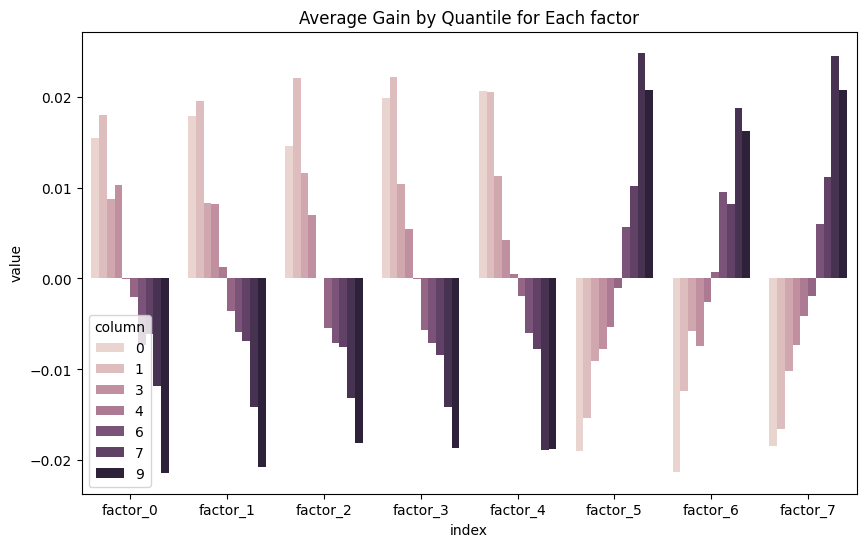

In [8]:
df = feature.copy()
num_quantiles = 10
for col in df.columns: 
    if col !='gain':
        df[f'factor_{col}'] = pd.qcut(df[col], num_quantiles, labels=False, duplicates='drop')

results = {}
for col in df.columns:  
    if col !='gain' and type(col)!=int:
        grouped = df.groupby(col)
        results[col] = grouped['gain'].mean()

results_df = pd.DataFrame(results).T.reset_index()

df_long = results_df.melt(id_vars=['index'], var_name='column', value_name='value')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='index', y='value', hue='column')
plt.title('Average Gain by Quantile for Each factor')
plt.show()


In [9]:
quantile_buy = {k:v for k, v in zip(df.columns[-8:],[1,1,1,1,0,8,8,8])}

# 测试集回测

In [10]:
feature = pd.DataFrame(Y_test)
feature['gain'] = test['30dGain'].values
df = feature.copy()
num_quantiles = 10
for col in df.columns: 
    if col !='gain':
        test[f'factor_{col}'] = pd.qcut(df[col], num_quantiles, labels=False, duplicates='drop').values
test['datetime'] = pd.to_datetime(test['date'])
test.set_index('datetime', inplace=True) 
test.columns = test.columns.map(str)
temp = {}
for name,group in test.groupby('name'):
    temp[name] = group
test = temp

In [11]:
test

{'DR派能科':                   date   name    code   open   high    low  close    volume  \
 datetime                                                                      
 2023-09-06  2023-09-06  DR派能科  688063  99.06  99.10  96.97  97.87   18313.0   
 2023-09-07  2023-09-07  DR派能科  688063  98.21  98.34  94.49  94.76   24552.0   
 2023-09-08  2023-09-08  DR派能科  688063  94.47  95.01  92.51  93.09   19657.0   
 2023-09-11  2023-09-11  DR派能科  688063  93.35  97.74  92.15  96.32   35016.0   
 2023-09-12  2023-09-12  DR派能科  688063  96.28  98.11  95.39  95.62   21420.0   
 ...                ...    ...     ...    ...    ...    ...    ...       ...   
 2024-05-16  2024-05-16  DR派能科  688063  53.90  54.58  52.94  53.02   20711.0   
 2024-05-17  2024-05-17  DR派能科  688063  53.59  53.69  51.97  53.09   19028.0   
 2024-05-20  2024-05-20  DR派能科  688063  49.13  49.13  44.97  45.55  110117.0   
 2024-05-21  2024-05-21  DR派能科  688063  45.55  45.90  44.97  45.24   37470.0   
 2024-05-22  2024-05-22  DR派能科 

In [12]:
import qstock as qs
hu300 = qs.get_data('000300', start = '2023-09-06',end ='2024-05-22' )['close']

In [13]:
hu300

date
2023-09-06    3812.03
2023-09-07    3758.47
2023-09-08    3739.99
2023-09-11    3767.54
2023-09-12    3760.60
               ...   
2024-05-16    3640.36
2024-05-17    3677.97
2024-05-20    3690.96
2024-05-21    3676.16
2024-05-22    3684.45
Name: close, Length: 168, dtype: float64

In [14]:
quantile_buy

{'factor_0': 1,
 'factor_1': 1,
 'factor_2': 1,
 'factor_3': 1,
 'factor_4': 0,
 'factor_5': 8,
 'factor_6': 8,
 'factor_7': 8}

In [15]:
import backtrader as bt
%matplotlib inline
import matplotlib.pyplot as plt

factor factor_0, quantile 1
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1130800.95
2024-05-22, Growth: 13.08%


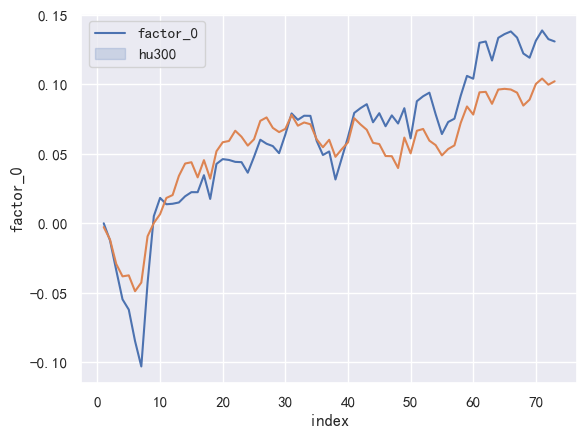

factor factor_1, quantile 1
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1108049.08
2024-05-22, Growth: 10.80%


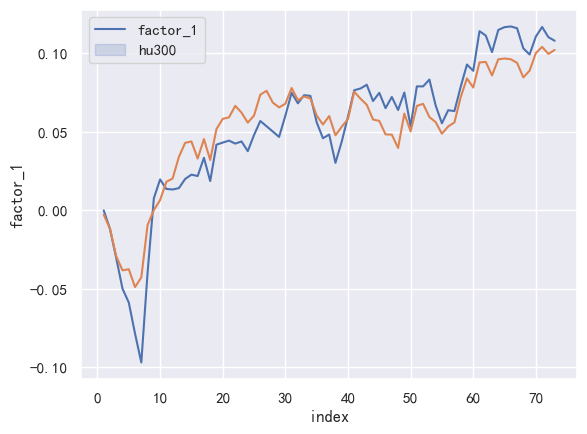

factor factor_2, quantile 1
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1101707.07
2024-05-22, Growth: 10.17%


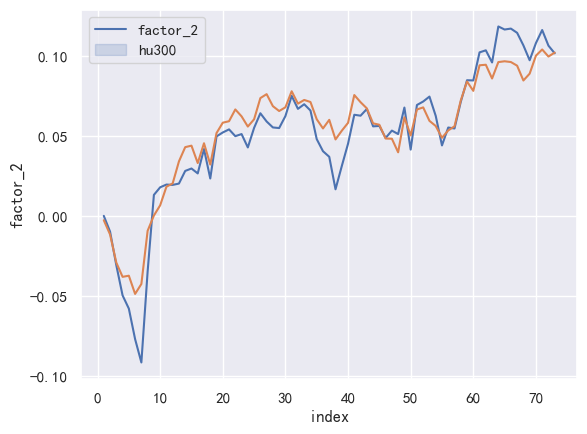

factor factor_3, quantile 1
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1104001.84
2024-05-22, Growth: 10.40%


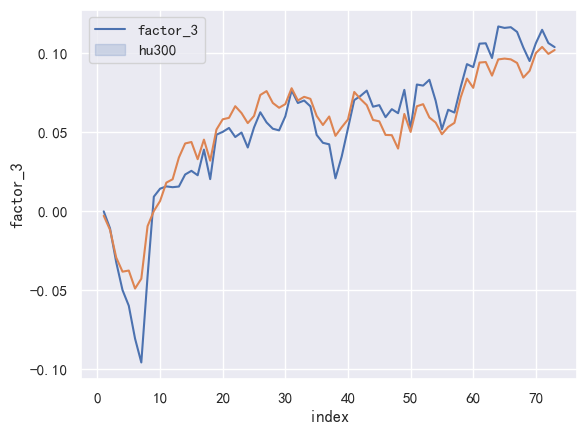

factor factor_4, quantile 0
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1070151.83
2024-05-22, Growth: 7.02%


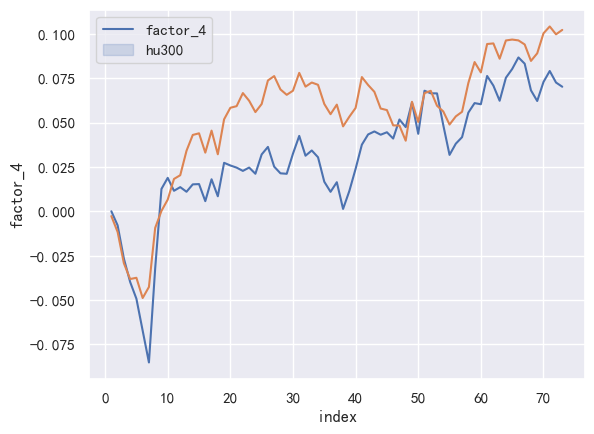

factor factor_5, quantile 8
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1113503.96
2024-05-22, Growth: 11.35%


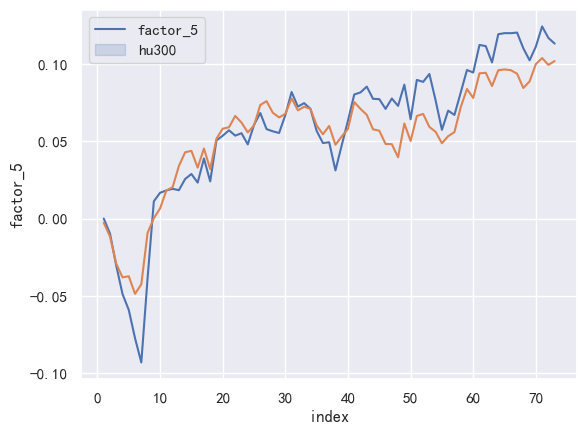

factor factor_6, quantile 8
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1129633.45
2024-05-22, Growth: 12.96%


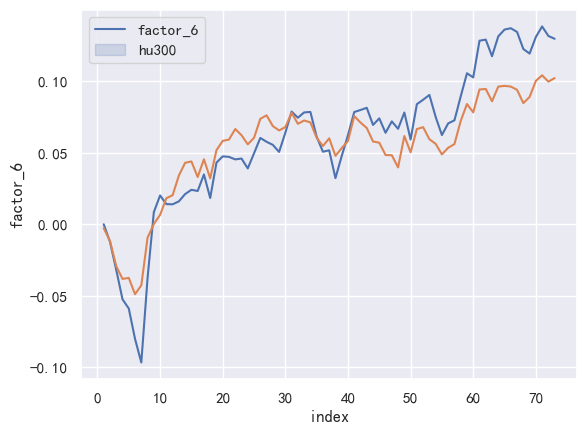

factor factor_7, quantile 8
2024-05-22, Starting Value: 1000000.00
2024-05-22, Ending Value: 1105953.44
2024-05-22, Growth: 10.60%


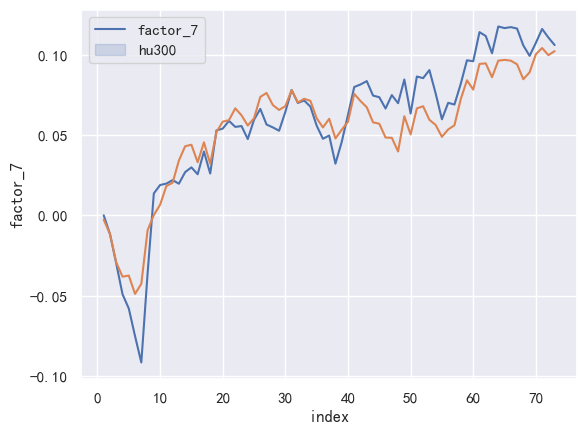

In [16]:
for quantile,quantile_value in zip(list(quantile_buy.keys()),list( quantile_buy.values())):
    print(f'factor {quantile}, quantile {quantile_value}')
    class CustomPandasData(bt.feeds.PandasData):
        lines = (quantile,)  
        params = (
            (quantile, -1),  
        )
    # Define the strategy
    class QuantileBasedStrategy(bt.Strategy):
        params = (
            ('target_quantile', None),  
            ('quantile_line', None), 
            ('rebalance_days', 20),  
        )
    
        def __init__(self):
            self.days_elapsed = 0
            self.counter = 0
            self.quantile_lines = {d: getattr(d.lines, self.p.quantile_line) for d in self.datas}
            self.val_start = self.broker.getvalue()       
            self.vals =  [self.val_start]
        def next(self):
            
            if self.days_elapsed % self.params.rebalance_days == 0:
                target_position = 0           
                for data in self.datas:  
                    if self.quantile_lines[data][0] == self.params.target_quantile:
                        target_position += 1                     
                    else:
                        if self.position:
                            self.sell()  
                if target_position > 0:
                    total_value = self.broker.getvalue()
                    target_percent = 1.0 / target_position 
                    target_value = total_value * target_percent 
                    for data in self.datas: 
                        if self.quantile_lines[data][0] == self.params.target_quantile:
                            current_price = data.close[0]
                            target_shares = target_value / current_price
                            target_shares = int(target_shares / 100) * 100
                            self.order_target_size(data, target=target_shares)
            self.days_elapsed += 1
            current_value = self.broker.getvalue()
            self.vals.append(current_value)
            self.counter += 1
        def log(self, txt, dt=None):
            dt = dt or self.datas[0].datetime.date(0)
            print(f'{dt.isoformat()}, {txt}')
        def stop(self):
            self.log('Starting Value: %.2f' % self.val_start)
            self.log('Ending Value: %.2f' % self.broker.getvalue())
            self.log('Growth: %.2f%%' % ((self.broker.getvalue() / self.val_start - 1.0) * 100))

    cerebro = bt.Cerebro()
    cerebro.addstrategy(QuantileBasedStrategy, target_quantile=quantile_value, quantile_line=quantile)
    
    for sto, df in test.items():
        data = CustomPandasData(dataname=df)
        cerebro.adddata(data)
    
    
    cerebro.broker.setcommission(commission=0.0003)
    cerebro.addobserver(bt.observers.Broker) 
    
    cerebro.broker.setcash(1000000.0)
    
    strategies = cerebro.run()
    first_strategy = strategies[0]
    net_values = first_strategy.vals
    net_df = pd.DataFrame({quantile:net_values,'hu300':hu300.values[-74:]})
    for col in net_df.columns:
        temp = net_df[col].pct_change()
        net_df[col] = (1 + temp).cumprod() - 1
        net_df[col] = net_df[col].astype(float)
    net_df = net_df.dropna().reset_index()
    sns.lineplot(data=net_df,x='index', y=quantile)
    sns.lineplot(data=net_df,x='index', y='hu300')
    plt.legend(labels=[quantile, 'hu300'])
    plt.show()
